In [138]:
import assp
import numpy as np
import importlib
importlib.reload(assp)
import matplotlib.pyplot as plt
import copy
import scipy

signal = assp.Signal1D([5, 10], [np.pi/2, np.pi/4], 200, [50, 25])
print(signal.s.shape)
window = 5
N = signal.N - window
P = np.zeros((N, 400), dtype=np.complex128)
for n in range(N):
    sig = copy.copy(signal)
    sig.s = sig.s[:, n:n+window]
    sig.N = sig.s.shape[1]
    ula = assp.ULA(signal.wavelength/2, 10, 5, sig)
    barlett = assp.BarlettBeamformer(2, 400, ula)
    P[n,:] = barlett.P


(2, 200)


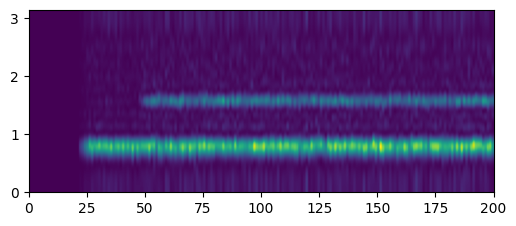

In [139]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.abs(P).T[:200,:], extent=[0, 200, 0, np.pi])
plt.ylabel = "\Theta [rad]"
plt.xlabel = "Latency [sample]"

ax.set_aspect(25)
plt.show()

In [33]:
import scipy.io
mat = scipy.io.loadmat('MeasurementforMiniproject.mat')
import numpy as np

In [34]:
X = np.array(mat['X'])
f = np.array(mat['f'])
f0 = np.array(mat['f0'])
r = np.array(mat['r'])
scen = np.array(mat['scen'])
tau = np.array(mat['tau'])
x =np.array(mat['x'])
X_synthetic = np.array(mat['X_synthetic'])
x_synthetic = np.array(mat['x_synthetic'])

In [35]:
print(f'f shape: {f.shape}') # frequency sweep (N=101 measured frequency points)
print(f'f0 shape: {f0.shape}') # carrier frequency
print(f'r shape: {r.shape}') # array sensor vectors: 71*66 = 4686
print(f'scen shape: {scen.shape}') # no f** clue what it is, but it's huge
print(f'tau shape: {tau.shape}') # delay shape (one delay for each impinging waves)
print(f'X shape: {X.shape}') # measured discrete space-frequency transfer function
print(f'x shape: {x.shape}') # measured discrete complex envelope of the wave field
print(f'X_synthetic shape: {X_synthetic.shape}') # synthetic discrete space-frequency transfer function
print(f'x_synthetic shape: {x_synthetic.shape}') # synthetic discrete complex envelope of the wave field

f shape: (101, 1)
f0 shape: (1, 1)
r shape: (2, 4686)
scen shape: (1, 1)
tau shape: (101, 1)
X shape: (4686, 101)
x shape: (4686, 101)
X_synthetic shape: (4686, 101)
x_synthetic shape: (4686, 101)


In [17]:
print(scen.shape)

(1, 1)


In [ ]:
import numpy as np
M = 30
N = 10

a = np.linspace(1, M*N, M*N).reshape((M, N))
print(a)

L1 = 4
L2 = 4
idx = [2, 1]


b = a[idx[0]:L1+idx[0], idx[1]:L2+idx[1]]
print('\n\n')
b = b.reshape(1, -1)[0]
print(b)


In [40]:
def get_subarray(M, N, L1, L2, idx=[0,0]):
    return np.linspace(0, M*N-1, M*N).reshape((M, N))[idx[0]:L1+idx[0], idx[1]:L2+idx[1]].reshape(1, -1)[0]


In [41]:
get_subarray(10, 10, 4, 4, [0,0])

array([ 0.,  1.,  2.,  3., 10., 11., 12., 13., 20., 21., 22., 23., 30.,
       31., 32., 33.])